# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

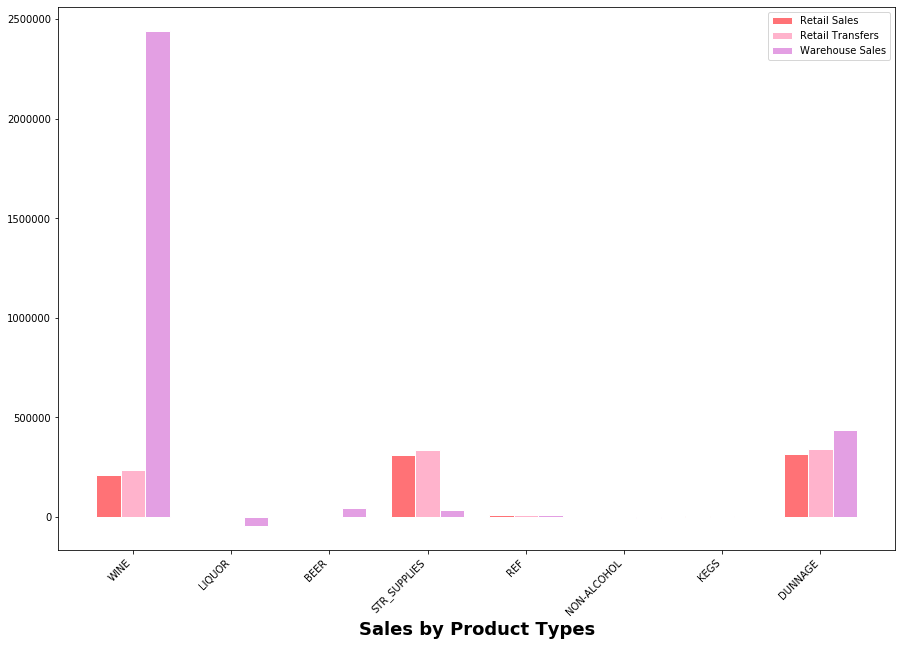

In [68]:
import numpy as np
 
# set width of bar
f, ax = plt.subplots(figsize=(15,10))
barWidth = 0.25
 
# set height of bar
bars1 = data.groupby('ItemType').agg({'RetailSales':'sum'})['RetailSales']
bars2 = data.groupby('ItemType').agg({'RetailTransfers':'sum'})['RetailTransfers']
bars3 = data.groupby('ItemType').agg({'WarehouseSales':'sum'})['WarehouseSales']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#ff7276', width=barWidth, edgecolor='white', label='Retail Sales')
plt.bar(r2, bars2, color='#ffb3cc', width=barWidth, edgecolor='white', label='Retail Transfers')
plt.bar(r3, bars3, color='#e39fe3', width=barWidth, edgecolor='white', label='Warehouse Sales')
 
# Add xticks on the middle of the group bars
plt.xlabel('Sales by Product Types', fontweight='bold',fontsize=18)
plt.xticks([r + barWidth for r in range(len(bars1))], ['WINE', 'LIQUOR', 'BEER', 'STR_SUPPLIES', 'REF', 'NON-ALCOHOL',
       'KEGS', 'DUNNAGE'],rotation=45,horizontalalignment='right')


# Create legend & Show graphic
plt.legend()
plt.show()


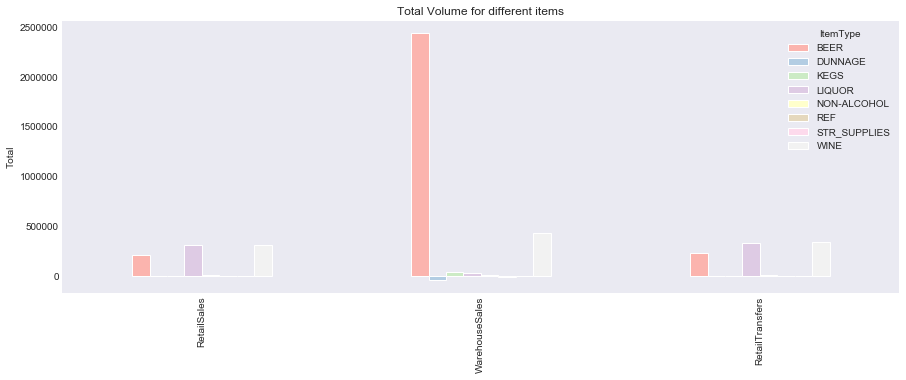

In [98]:
df1=data.groupby('ItemType')[["RetailSales","WarehouseSales","RetailTransfers"]].sum()
sns.set_style('dark')
df1.T.plot.bar(figsize=(15,5),cmap='Pastel1')
plt.title('Total Volume for different items')
plt.ylabel('Total')
plt.show()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

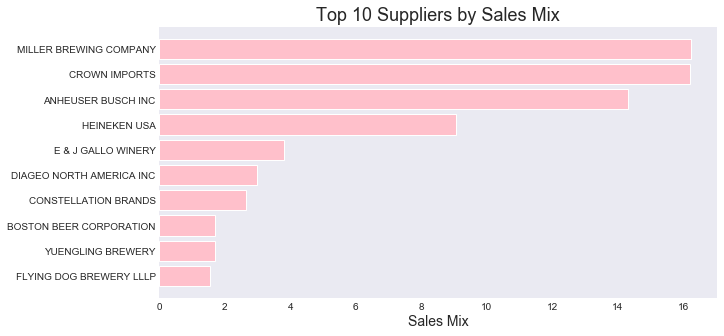

In [105]:
data['TotalSales']=data['RetailSales']+data['WarehouseSales']
data['MixSales']=data['TotalSales']/(data['TotalSales'].sum())*100
top_ten=data.groupby('Supplier').agg({'MixSales':'sum'}).sort_values(by='MixSales',ascending=True).tail(10)['MixSales'].tolist()
top_ten_supp=data.groupby('Supplier').agg({'MixSales':'sum'}).sort_values(by='MixSales',ascending=True).tail(10).reset_index()['Supplier'].tolist()


f, ax = plt.subplots(figsize=(10,5))

height = top_ten
bars =top_ten_supp
y_pos = np.arange(len(bars))
 
plt.barh(y_pos, height,color='pink')
 
plt.yticks(y_pos, bars)
plt.title('Top 10 Suppliers by Sales Mix',fontsize=18,fontname='Arial')
plt.xlabel('Sales Mix',fontsize=14)
 
plt.show()


## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

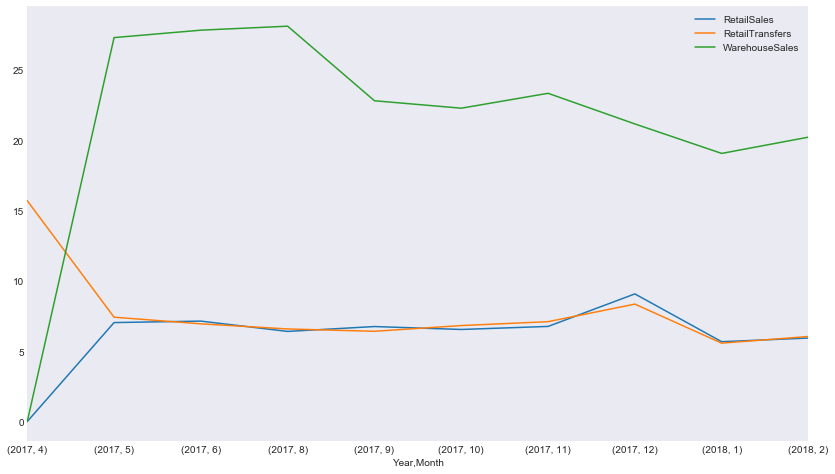

In [110]:
avg_sales=data.groupby(['Year','Month']).mean().drop(['TotalSales','MixSales'],axis=1)
avg_sales.plot(figsize=(14,8))

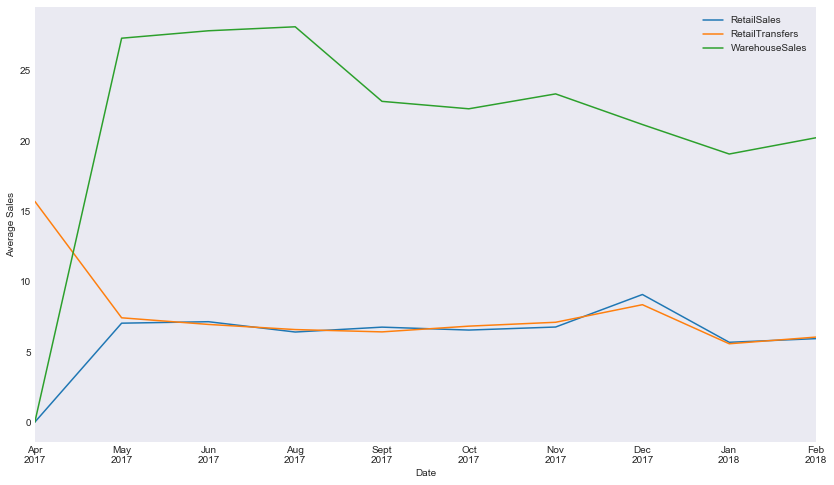

In [132]:
dct={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}

xticks=[f'{dct[j]}\n{i}'for i,j in data.groupby(['Year','Month']).groups.keys()]

avg_sales.plot(figsize=(14,8))
plt.xticks(range(len(xticks)),xticks)
plt.ylabel('Average Sales')
plt.xlabel('Date')
plt.show()

## 4. Plot the same information as above but as a bar chart.

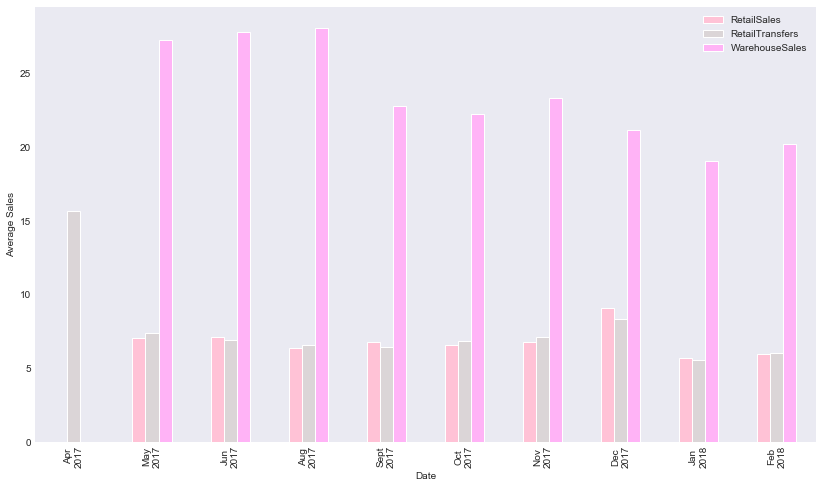

In [128]:
avg_sales.plot.bar(figsize=(14,8),color=['#ffc2d6','#dbd5d7','#ffb3f6'])
plt.xticks(range(len(xticks)),xticks)
plt.ylabel('Average Sales')
plt.xlabel('Date')
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

## 6. Plot the same information as above but as a bar chart.

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

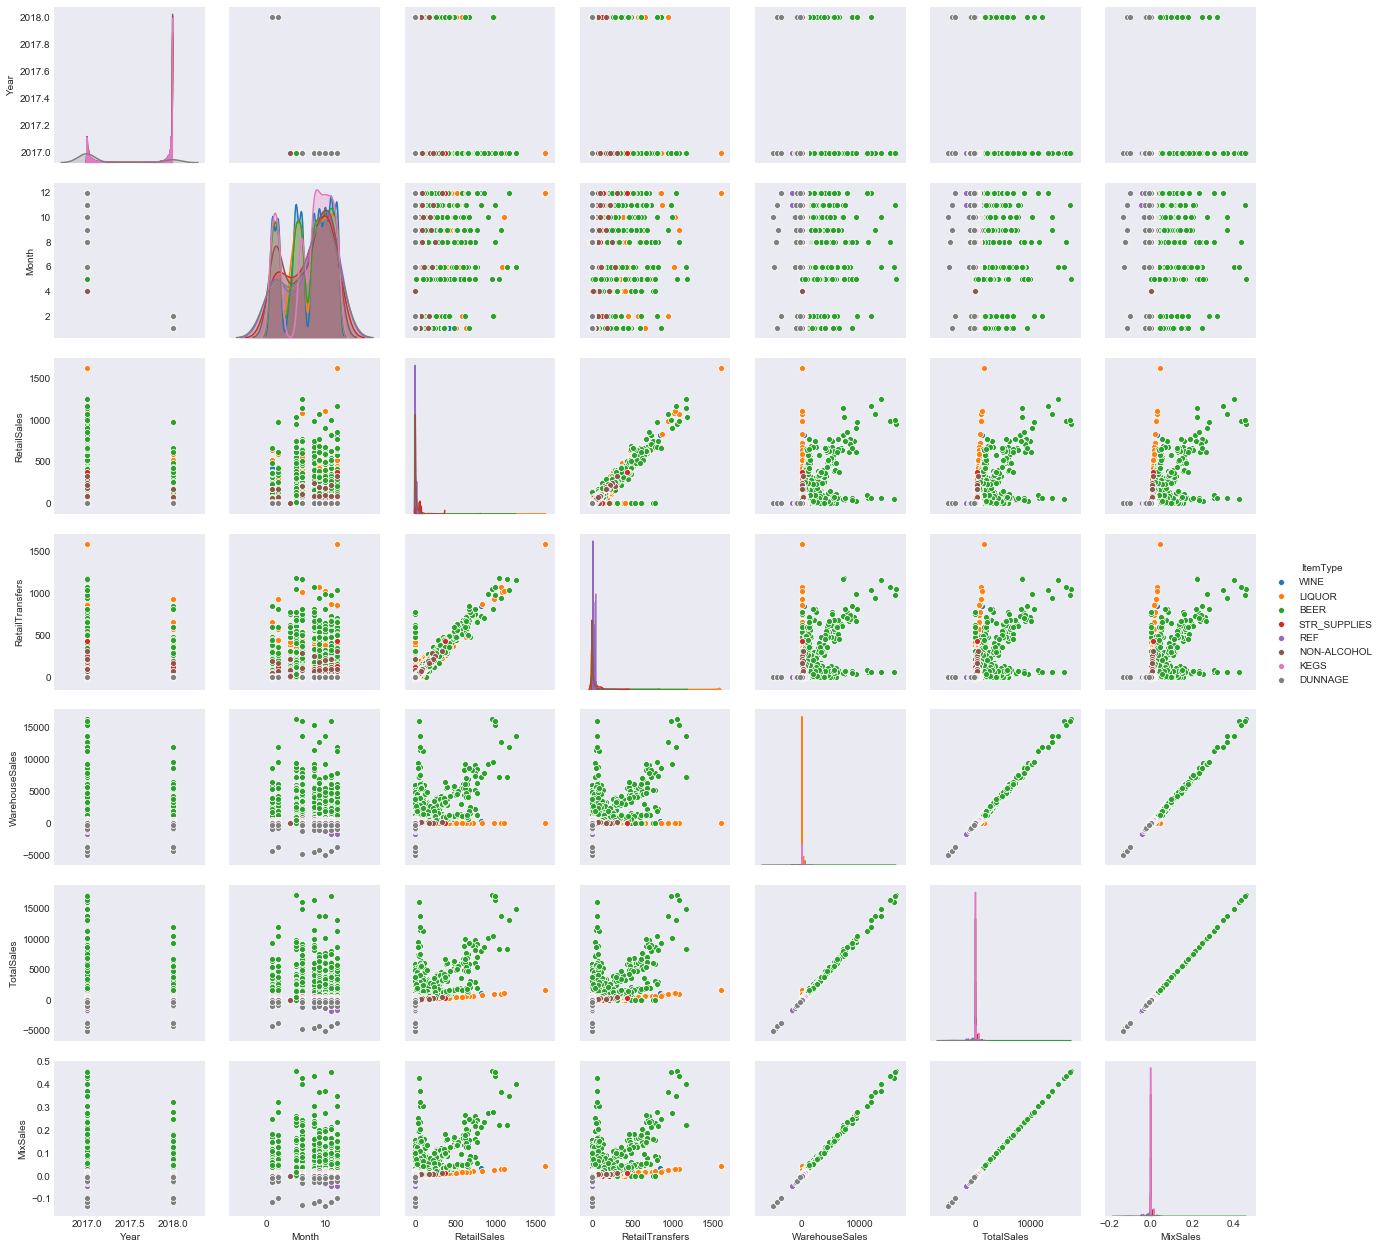

In [133]:
sns.pairplot(data,hue='ItemType')